# Parkinson's Disease:

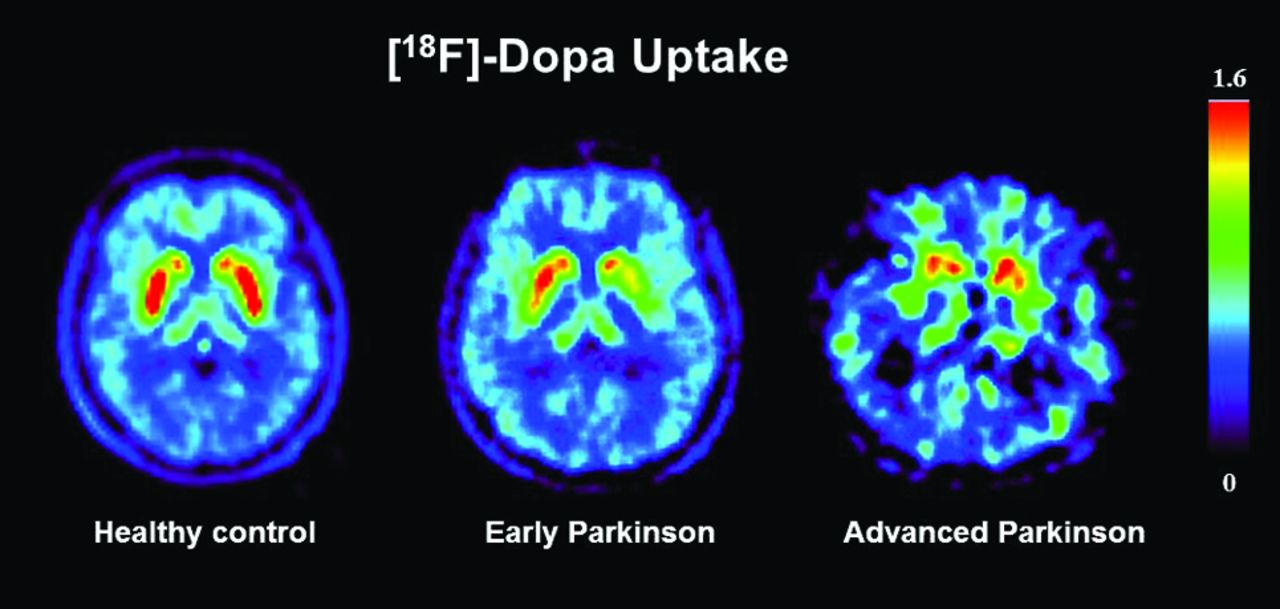

For this project, I am building 2 machine learning models to detect Parkinson's Disease: 
  - Logistic Regression Model:
    - there are 2 classifications which is why this model is used
  - Model using XGBoost
    - XGBoost is used to improve speed and perfomance

------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------

- Why Parkinson's Disease?
  - I wanted to do research for ALS but I couldn't find anything so I decided on Parkinson's Disease because the two have similarities. 

- ALS vs Parkinson's Disease
  - Amyotrophic Lateral Sclerosis (ALS also known as Lou Gerig's Disease)
  - Both are neurodegenerative diseases
    - Nerve cells in the brain and the peripheral nervous system (PNS) lose function 
      - loss of muscle function
  - Initial signs of ALS:
    - weakness in the hands and feet
    - poor posture
    - difficulty walking
  - Initial signs of Parkinson's Disease:
    - tremors of the hands
    - typically diagnosed in people over the age of 60
    - change in speech (which is used in this dataset)
  - ALS is fatal
  - Parkinson's Disease is not fatal
  - Neither has a cure

In [55]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [56]:
# Upload the data from local drive

from google.colab import files
uploaded = files.upload()

Saving parkinsons.data to parkinsons (1).data


In [57]:
import io

df = pd.read_csv(io.BytesIO(uploaded['parkinsons.data']))
df.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [58]:
df['name'].count()

195

# About the Data:

- Dataset is composed of a range of biomedical voice measurements from 31 people
- 23 of the 31 people have Parkinson's Disease
- Each column has a particular voice measurement 
- 23 different attributes
- Data collected by Max Little of the University of Oxford

## Column Information
- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency

## Measures of variation in fundamental frequency

- MDVP:Jitter(%)
- MDVP:Jitter(Abs)
- MDVP:RAP,MDVP:PPQ
- Jitter:DDP - Several 

## Several measures of variation in amplitude

- MDVP:Shimmer
- MDVP:Shimmer(dB)
- Shimmer:APQ3
- Shimmer:APQ5
- MDVP:APQ
- Shimmer:DDA 

## Two measures of ratio of noise to tonal components in the voice:

- NHR
- HNR

## Health status of the subject (one) - Parkinson's, (zero) - healthy
status 

## Two nonlinear dynamical complexity measures
- RPDE
- D2 

## Signal fractal scaling exponent
- DFA 

## Three nonlinear measures of fundamental frequency variation
- spread1 
- spread2
- PPE 

In [59]:
# View all of the column names

df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [60]:
# Get the features and labels
features=df.loc[:,df.columns!='status'].values[:,1:]     # the features are everything except the status column
labels=df.loc[:,'status'].values    # the values we want are from the status column 

Use .value_counts() to view the count for each label

In [61]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

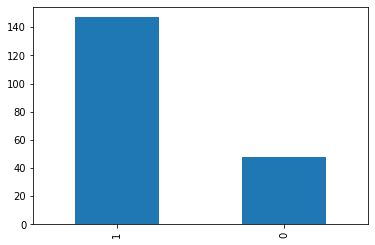

In [62]:
# visualization of the status column

df['status'].value_counts().plot(kind='bar')

# Normalize the data by scaling it

In [63]:
from sklearn.preprocessing import StandardScaler

standard_scaler=StandardScaler()   # Scale the features
x = standard_scaler.fit_transform(features)     # the .fit_transform() method fits the data and then transforms it
y = labels

Split the dataset into training and testing.
- Using 20% of the data for testing

In [64]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=7)

In [65]:
# Build the logistic regression model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# fit model to see who is classifed as healthy or unhealthy
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
# Score the model on the train data

logreg.score(x_train, y_train)*100

87.17948717948718

# Now I will utilize a new tool to train the model: XGBClassifier

- XGBoost is designed for speed and performance

In [67]:
XGB_scaler = MinMaxScaler((-1,1))     # Scale the features to between -1 and 1
x = XGB_scaler.fit_transform(features)
y = labels

In [68]:
XGB_model = XGBClassifier()
XGB_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [69]:
y_pred = XGB_model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

94.87179487179486


Conclusion:

- Accuracy of the Logistic Regression model = 87.17%

- Accuracy using XGBClassifier = 94.87%
-------------
- Difference in accuracy = 7.7%
